# 2019 DSC AWS Learning Group
### Titanic: Machine Learning from Disaster
### https://www.kaggle.com/c/titanic

### Load Libraries

In [61]:
# pandas is the most popular library for any work related to data management
import pandas as pd

# numpy is great library for doing mathematical operations
import numpy as np

# matplotlib is a powerful plotting library for Python
from matplotlib import pyplot as plt
import seaborn as sns

# magic command so that charts created by matplotlib can be shown in the jupyter notebook
%matplotlib inline 
plt.style.use('fivethirtyeight')
import warnings ## importing warnings library.
warnings.filterwarnings('ignore') ## Ignore warning

### Exploratory Data Analysis

In [52]:
# import the datasets
train = pd.read_csv('https://raw.githubusercontent.com/DataScienceClub777/DSC/master/titanic_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/DataScienceClub777/DSC/master/titanic_test.csv')

In [53]:
# inspect the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# inspect the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
# let's dig a little deeper
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [56]:
# how many missing values are there?
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

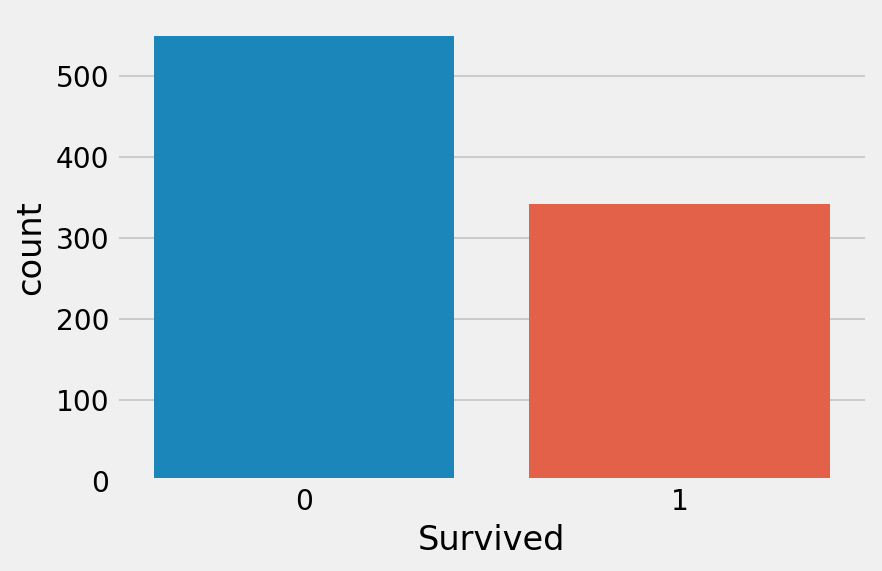

In [57]:
# is our dataset balanced?
sns.countplot('Survived',data=train)
plt.show()

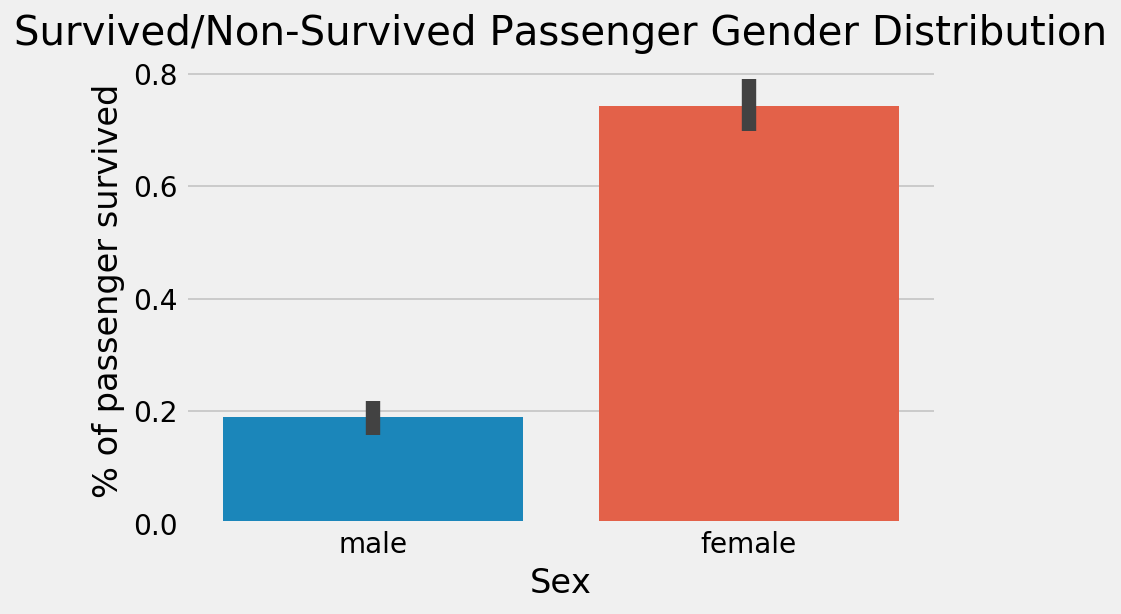

In [58]:
# let's examine the survival rate by gender
sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train)
plt.title("Survived/Non-Survived Passenger Gender Distribution")
plt.ylabel("% of passenger survived")
plt.xlabel("Sex");

Text(0.5,1,'Survived/Non-Survived Passenger Gender Distribution')

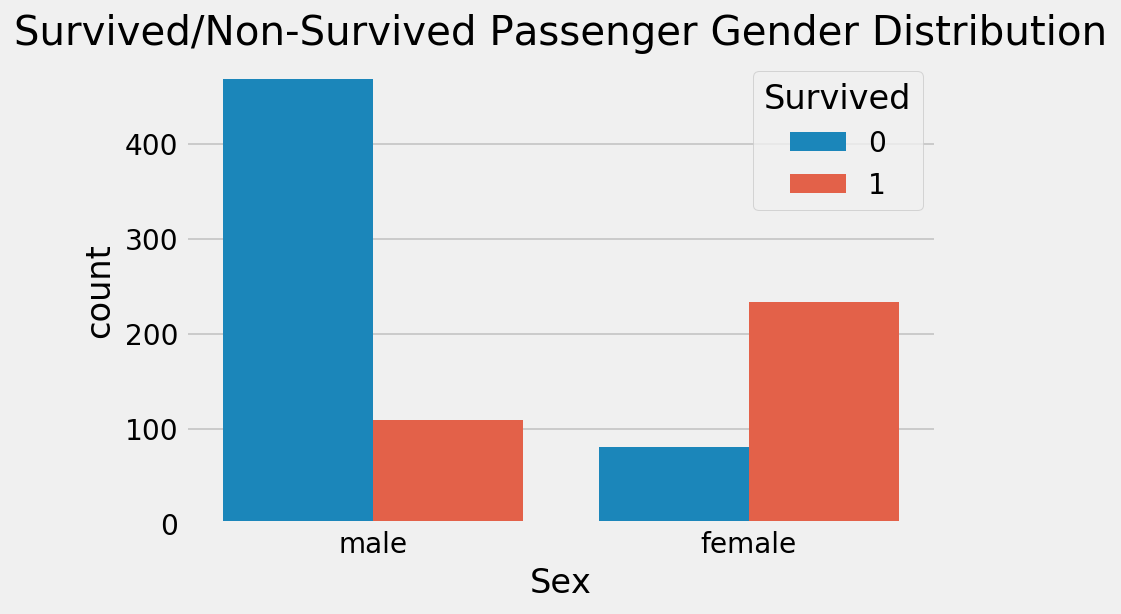

In [65]:
# more detail on survival rate by gender
sns.countplot(x = "Sex", hue="Survived", data = train, linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution")


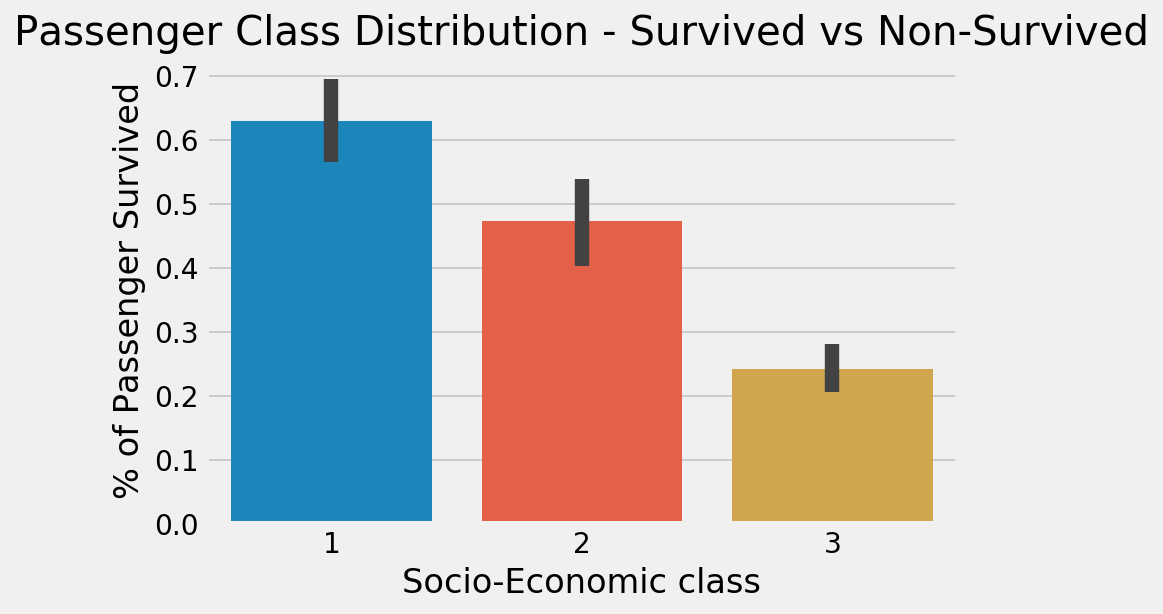

In [67]:
# what about survival rate by socio-economic class?
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived")
plt.xlabel("Socio-Economic class");
plt.ylabel("% of Passenger Survived");
labels = ['Upper', 'Middle', 'Lower']

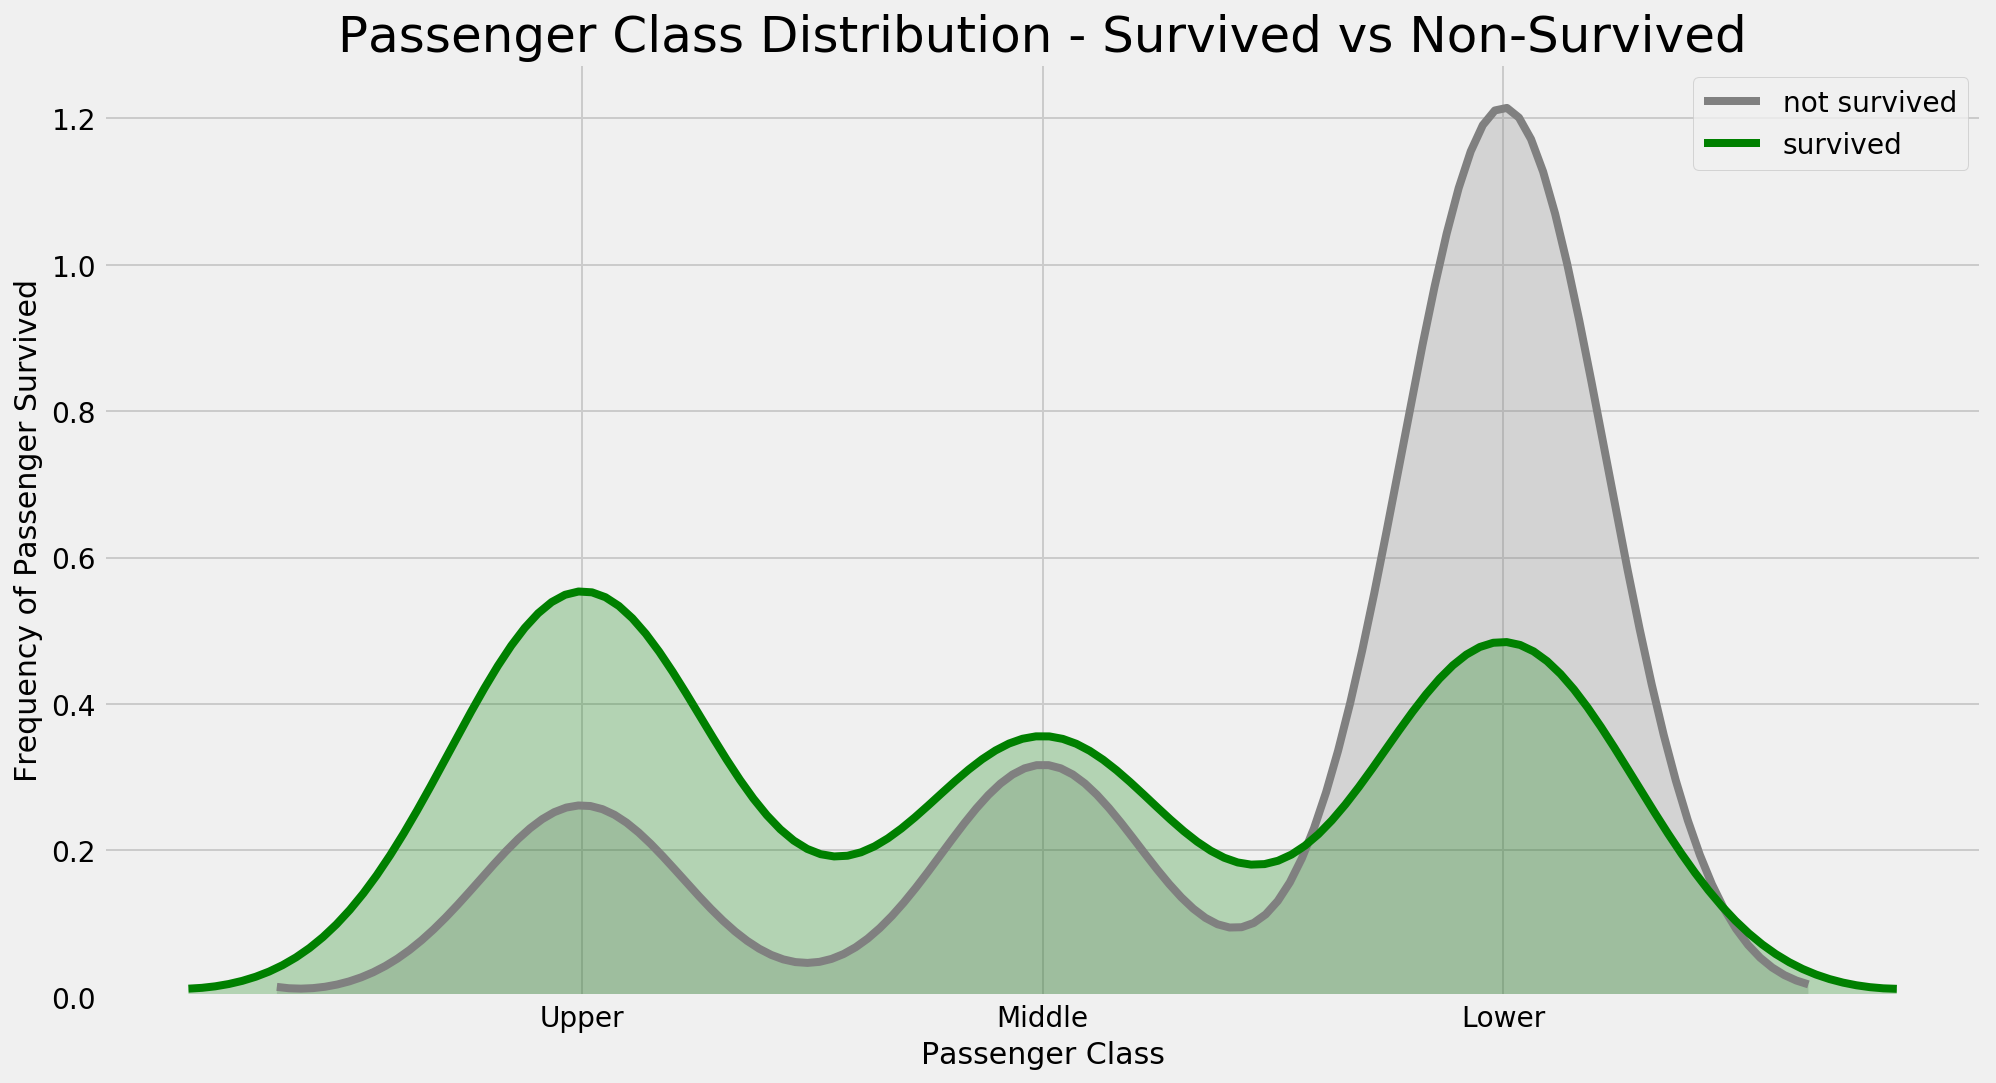

In [71]:
# Let's create a kernal density plot to further examine survival rate by socio economic class
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)

# Convert xticks into words
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);